# IMDb Movie Data EDA

**Authors:** Franko Ndou, Anthony Brocco

# Overview

IMDb has an SQL database containing extensive movie data, along with two other CSV files that we have obtained. These resources will assist us in conducting an Exploratory Data Analysis (EDA) to address complex business challenges. Our objective is to identify the top-performing films at the current box office and translate our findings into comprehensible data visualizations and recommendations.

# Business Problem

Universal Pictures is aiming to produce the next blockbuster film with a substantial budget. They intend to assemble the finest directors, actors, and implement optimal business strategies to not only create the greatest film of our generation but also to maximize return on investment (ROI). Our task is to conduct an in-depth Exploratory Data Analysis (EDA) using extensive datasets to assist Universal in reaching a conclusion on the most effective approach to achieve this ambitious goal.

# Creating the Production team

To create a best-selling film, assembling a top-notch production team is essential. Identifying the best director and writer for the job is crucial. While actors play significant roles, directors often craft roles with specific actors in mind. Therefore, determining the most successful actor may not directly contribute to our production team's ability to make the best possible movie. The success of a film largely hinges on the artistic vision of the director and the script quality. Relying solely on statistics related to actors may not enhance our return on investment (ROI) and could potentially have a detrimental impact on the film's quality.

## Setting up the workspace

In [2]:
#Importing libraries
import pandas as pd
import sqlite3 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import warnings


# Ignores warnings 
warnings.filterwarnings("ignore")

In [3]:
# Creating data frames and establishing connections
budgets = pd.read_csv('../zippedData/movie_budget_cleaned.csv')
gross = pd.read_csv('../zippedData/gross_movie_cleaned.csv')
conn = sqlite3.connect('../zippedData/im.db')

In [4]:
# Finding directors with the highest rated movies as well as their rating
pd.read_sql("""
    SELECT movie, max_averagerating, numvotes
    FROM (
        SELECT p.primary_name AS movie, MAX(averagerating) AS max_averagerating, numvotes
        FROM movie_ratings AS mr
        JOIN directors AS d ON mr.movie_id = d.movie_id
        JOIN persons AS p ON p.person_id = d.person_id
        WHERE averagerating >= 8 AND numvotes > 2500
        GROUP BY p.primary_name, numvotes
    ) AS subquery
    GROUP BY movie
    ORDER BY numvotes DESC
    
""", conn).head(10)

,movie,max_averagerating,numvotes
0,Christopher Nolan,8.6,1299334
1,Joss Whedon,8.1,1183655
2,James Gunn,8.1,948394
3,Tim Miller,8.0,820847
4,J.J. Abrams,8.0,784780
5,George Miller,8.1,780910
6,David Fincher,8.1,761592
7,David Yates,8.1,691835
8,Ridley Scott,8.0,680116
9,Éric Toledano,8.5,677343


In [5]:
# Finding writers with the highest rated movies as well as their rating
pd.read_sql("""
    SELECT movie, max_averagerating, numvotes
    FROM (
        SELECT p.primary_name AS movie, MAX(averagerating) AS max_averagerating, numvotes
        FROM movie_ratings AS mr
        JOIN writers AS w ON mr.movie_id = w.movie_id
        JOIN persons AS p ON p.person_id = w.person_id
        WHERE averagerating >= 8 AND numvotes > 2500
        GROUP BY p.primary_name, numvotes
    ) AS subquery
    GROUP BY movie
    ORDER BY numvotes DESC
""", conn).head(10)

,movie,max_averagerating,numvotes
0,David S. Goyer,8.4,1387769
1,Bob Kane,8.4,1387769
2,Jonathan Nolan,8.6,1299334
3,Christopher Nolan,8.6,1299334
4,Zak Penn,8.1,1183655
5,Joss Whedon,8.1,1183655
6,Terence Winter,8.2,1035358
7,Jordan Belfort,8.2,1035358
8,Laeta Kalogridis,8.1,1005960
9,Dennis Lehane,8.1,1005960


Observing the data we have, it seems like Christopher Nolan is one of the most critically acclaimed directors currently. However, it's important we include some diversity within our recommendations as well. J.J. Abrams and David Fincher appear to be great options as well. They seem to be fantastic writers as well. Christopher Nolan's brother, Jonathan Nolan, appears on the list as well. I'm sure the two of them collaborate often, but we should delve a little deeper into this data and see the box office performance and critical feedback of all of their movies.

In [6]:
# Movies Christopher Nolan has directed
c_nolan_films = pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN directors AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "Christopher Nolan"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn)
                            
c_nolan_films.head()

,movie,genres,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Dunkirk,"Action,Drama,History",7.9,466580


In [7]:
# Movies J.J. Abrams has directed
j_abrams_films = pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN directors AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "J.J. Abrams"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn)
                            
j_abrams_films.head()

,movie,genres,averagerating,numvotes
0,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",8.0,784780
1,Star Trek Into Darkness,"Action,Adventure,Sci-Fi",7.7,445535
2,Super 8,"Mystery,Sci-Fi,Thriller",7.0,320575


In [8]:
# Movies David Fincher has directed
d_fincher_films = pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN directors AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "David Fincher"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn)
                            
d_fincher_films.head()

,movie,genres,averagerating,numvotes
0,Gone Girl,"Drama,Mystery,Thriller",8.1,761592
1,The Social Network,"Biography,Drama",7.7,568578
2,The Girl with the Dragon Tattoo,"Crime,Drama,Mystery",7.8,387580


In [9]:
# Movies Chrisopher Nolan has written
pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN writers AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "Christopher Nolan"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn).head()

,movie,genres,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Man of Steel,"Action,Adventure,Sci-Fi",7.1,647288
4,Dunkirk,"Action,Drama,History",7.9,466580


In [10]:
# Movies J.J. Abrams has written
pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN writers AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "J.J. Abrams"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn).head()

,movie,genres,averagerating,numvotes
0,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",8.0,784780
1,Super 8,"Mystery,Sci-Fi,Thriller",7.0,320575


In [11]:
# Movies David Fincher has written
pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN writers AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "David Fincher"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn).head()

,movie,genres,averagerating,numvotes


In [12]:
# Movies that Jonathan Nolan has written
pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN writers AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "Jonathan Nolan"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn).head()

,movie,genres,averagerating,numvotes
0,The Dark Knight Rises,"Action,Thriller",8.4,1387769
1,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334


It appears that David Fincher doesn't write any of his movies; however, nearly all of these films have received high ratings and garnered substantial votes. All of these individuals seem more than qualified to produce an excellent movie.

In [13]:
# Merging dataframes to check for ROI (Christopher Nolan)
c_nolan_films = budgets.merge(c_nolan_films)
pd.set_option('display.float_format', '{:.2f}'.format)
c_nolan_films.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,ROI,averagerating,numvotes
count,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
mean,111.50,37.50,187500000.00,279700367.00,771545121.00,3.13,8.43,1248687.25
std,69.58,23.98,58665719.69,122443157.23,249586963.97,0.79,0.39,572862.16
min,10.00,11.00,150000000.00,188017894.00,499837368.00,2.33,7.90,466580.00
25%,100.75,26.75,157500000.00,189555683.50,624743873.25,2.79,8.28,1091145.50
50%,134.00,35.00,162500000.00,241322237.50,750952008.50,2.99,8.50,1343551.50
75%,144.75,45.75,192500000.00,331466921.00,897753256.25,3.33,8.65,1501093.25
max,168.00,69.00,275000000.00,448139099.00,1084439099.00,4.22,8.80,1841066.00


- The average Christopher Nolan film has a budget of $187,500,000

- The average Christopher Nolan film has a worldwide gross of $771,545,121

- The average Christopher Nolan film has a ROI of 3.13

- The average Christopher Nolan film has an average rating of 8.43

In [14]:
# Merging dataframes to check for ROI (David Fincher)
d_fincher_films = budgets.merge(d_fincher_films)
pd.set_option('display.float_format', '{:.2f}'.format)
d_fincher_films.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,ROI,averagerating,numvotes
count,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
mean,891.67,59.33,63666666.67,122415225.33,277621098.00,3.77,7.87,572583.33
std,472.56,28.43,25106440.08,39373972.16,79092398.40,1.84,0.21,187038.17
min,450.00,36.00,40000000.00,96962694.00,224922135.00,1.66,7.70,387580.00
25%,642.50,43.50,50500000.00,99739243.50,232148052.50,3.14,7.75,478079.00
50%,835.00,51.00,61000000.00,102515793.00,239373970.00,4.62,7.80,568578.00
75%,1112.50,71.00,75500000.00,135141491.00,303970579.50,4.83,7.95,665085.00
max,1390.00,91.00,90000000.00,167767189.00,368567189.00,5.04,8.10,761592.00


- The average David Fincher film has a budget of $63,666,666

- The average David Fincher film has a worldwide gross of $277,621,098

- The average David Fincher film has a ROI of 3.77

- The average David Fincher film has an average rating of 7.87

In [15]:
# Merging dataframes to check for ROI (J.J Abrams)
j_abrams_films = budgets.merge(j_abrams_films)
pd.set_option('display.float_format', '{:.2f}'.format)
j_abrams_films.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,ROI,averagerating,numvotes
count,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
mean,579.50,80.50,120000000.00,177891420.00,362677164.50,2.81,7.35,383055.00
std,724.78,17.68,98994949.37,71965426.37,148074410.10,1.91,0.49,88360.06
min,67.00,68.00,50000000.00,127004179.00,257972745.00,1.46,7.00,320575.00
25%,323.25,74.25,85000000.00,152447799.50,310324954.75,2.13,7.17,351815.00
50%,579.50,80.50,120000000.00,177891420.00,362677164.50,2.81,7.35,383055.00
75%,835.75,86.75,155000000.00,203335040.50,415029374.25,3.48,7.53,414295.00
max,1092.00,93.00,190000000.00,228778661.00,467381584.00,4.16,7.70,445535.00


- The average J.J Abrams film has a budget of $120,000,000

- The average J.J Abrams film has a worldwide gross of $362,677,164
- The average J.J Abrams film has a ROI of 2.81
- The average J.J Abrams film has an average rating of 7.35

Clearly, all of these directors are very talented, but Christopher Nolan stands out with the highest average rating for his movies. Additionally, he has worked with the largest budgets and consistently achieved high gross earnings on average. While his ROI might not be as high as David Fincher's, his impressive average rating and extensive experience in handling extremely high budget films make him a strong candidate.

However, it's important to conduct some t-tests to assess the likelihood and confidence of Christopher Nolan's movies outperforming those of other directors. This statistical analysis will provide valuable insights into the comparative performance of different directors and help us make more informed recommendations for Universal Pictures.

## Hypothesis testing

Simply by examining this data, we can assume that Christopher Nolan is a talented director. However, it's wiser to assess the confidence level in this hypothesis rather than relying solely on visualizations. Mathematically, we can either validate or refute the hypothesis that Christopher Nolan will produce a higher ROI compared to other directors.

To begin, let's conduct a few T-tests with a confidence interval of 95%. This statistical analysis will allow us to ascertain the degree of confidence in our hypothesis and provide a more rigorous basis for our conclusions regarding his potential performance.

In [16]:
# Filtering for high budget blockbuster movies
high_budgets = budgets[budgets['production_budget'] >= 50000000]
high_budgets

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,5.53
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.55
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.57
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.24
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.15
...,...,...,...,...,...,...,...,...
1203,1203,4,2013-03-15,Upside Down,50000000,102118,26387039,-0.47
1204,1204,5,2015-10-02,Shanghai,50000000,46425,15505922,-0.69
1205,1205,6,2020-12-31,Hannibal the Conqueror,50000000,0,0,-1.00
1206,1206,7,2019-11-08,Arctic Dogs,50000000,0,0,-1.00


In [17]:
#Finding population mean
high_budgets.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,ROI
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,603.50,50.20,95629935.13,110600357.39,277832885.52,1.74
std,348.86,29.02,50501519.28,105313709.24,288919210.23,2.24
min,0.00,1.00,50000000.00,0.00,0.00,-1.00
25%,301.75,25.00,60000000.00,40828757.25,88703366.25,0.20
50%,603.50,50.00,80000000.00,78368442.50,184531488.00,1.23
75%,905.25,75.00,116250000.00,143551416.50,356218532.50,2.62
max,1207.00,100.00,425000000.00,936662225.00,2776345279.00,15.49


In [18]:
# Performing Nolan test
stats.ttest_1samp(c_nolan_films['ROI'], 1.74)

Ttest_1sampResult(statistic=3.5295998983514654, pvalue=0.038650297441573986)

In [19]:
# Performing Fincher test
stats.ttest_1samp(d_fincher_films['ROI'], 1.74)

Ttest_1sampResult(statistic=1.9116222577918325, pvalue=0.19608030549749136)

In [20]:
# Performing Abrams test
stats.ttest_1samp(j_abrams_films['ROI'], 1.74)

Ttest_1sampResult(statistic=0.7924863500783006, pvalue=0.5733739533852609)

Based on the sample set we have, there is a 3.8% chance that Christopher Nolan's films will not achieve an ROI of 1.74 or higher. This suggests a high likelihood (96.2%) that Christopher Nolan will indeed generate a return on investment for us.

However, the same level of confidence cannot be expressed for the other directors. It appears more likely that these directors will perform similarly to or worse than the average ROI within the industry.

Given this analysis, it strongly recommends employing Christopher Nolan as the director and potentially as the writer for our film. If he wishes to collaborate with his brother or any other writer, that would certainly be acceptable, considering his significant success within the industry. This decision aligns with the data-driven evidence we have and is likely to yield a favorable ROI for Universal Pictures.

# Which Genres have the largest ROI?

In [21]:
# Setting a threshold for 'successful' movies
df_successful = budgets[budgets['ROI'] > 1]
# Reading in our cleaned basics dataframe
df_basics = pd.read_csv('../zippedData/movie_basics_cleaned.csv',index_col = 0)

In [22]:
# Drop 'movie_id' column from df_basics
df_basics = df_basics.drop('movie_id', axis=1)

# Drop 'id' column from df_successful
df_successful = df_successful.drop('id', axis=1)

# Merge the DataFrames using 'movie' column from df_successful and 'primary_title'
merged_df = pd.merge(df_successful, df_basics, left_on='movie', right_on='primary_title', how='inner')

# Create a new DataFrame by combining 'primary_title' and 'original_title'
merged_df['title'] = merged_df['primary_title'].combine_first(merged_df['original_title'])

# Drop 'primary_title' and 'original_title' columns
merged_df = merged_df.drop(['primary_title', 'original_title'], axis=1)

#Create 'successful_movies' dataframe and clean out unneccesary columns or duplicates
successful_movies_df = merged_df.drop(['title', 'start_year'],axis = 1).drop_duplicates(subset = 'movie')

#Filtering for movies with budget greater than $50 Mil to make it more relevant to our budget
relevant_movies_df = successful_movies_df[successful_movies_df['production_budget'] > 50000000]

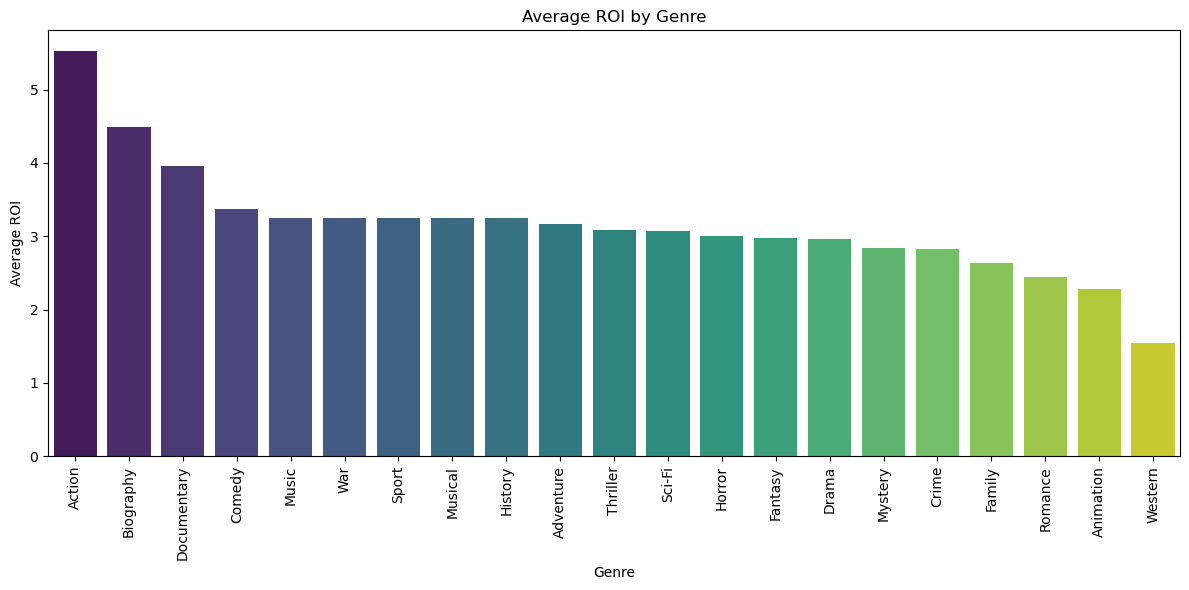

In [23]:
# Here i preprocessed the genres column using the split and stack functions, and then resetting the index
genres_df = relevant_movies_df['genres'].str.split(',', expand=True).stack().reset_index(level=0, drop=True).rename('genre')
merged_df = relevant_movies_df.drop('genres', axis=1).join(genres_df).sort_values(by='ROI', ascending = False)

# Calculate average ROI for each genre
genre_roi_avg = merged_df.groupby('genre')['ROI'].mean().reset_index().sort_values(by='ROI', ascending = False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_roi_avg, x='genre', y='ROI', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.title('Average ROI by Genre')
plt.tight_layout()
plt.show()

It's apparent from the data that action movies have the highest ROI among different genres by a significant margin. This aligns perfectly with our objective of working with a director who excels in this genre. While the other genres appear to have relatively similar performance, it's clear that there is a strong consumer preference for action films.

Considering our goal of creating the next blockbuster film and the evident demand for action movies, it seems like a strategic and lucrative business decision to pursue an action film project. This choice is likely to resonate well with the audience and maximize our chances of achieving a high ROI.

# Best time to release films

In [24]:
# Creating new column day of the week
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets['day_of_the_week'] = budgets['release_date'].dt.strftime("%A")
budgets['domestic_gross_in_mill'] = budgets['domestic_gross'] / 1000000

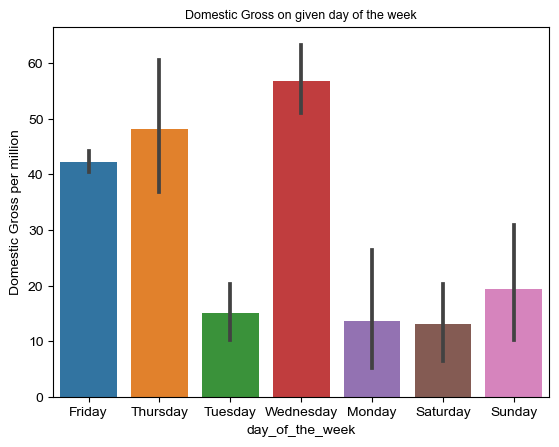

In [25]:

# Create bars
sns.barplot(x = 'day_of_the_week', y = 'domestic_gross_in_mill', data = budgets)
sns.set(font_scale=0.75)

# Show graphic
plt.ylabel('Domestic Gross per million')
plt.title('Domestic Gross on given day of the week')
plt.show()

It looks like Wednesday is the best day to release our movie, and this choice has strong data support. So, we should try to release it on a Wednesday or, if not possible, on a Thursday.

We should also check which month has the highest domestic earnings for movies in our industry. This will help us decide on the best month to release our film and potentially earn more money.

In [26]:
# Creating new column Month of the year
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets['month_of_the_year'] = budgets['release_date'].dt.strftime('%B')

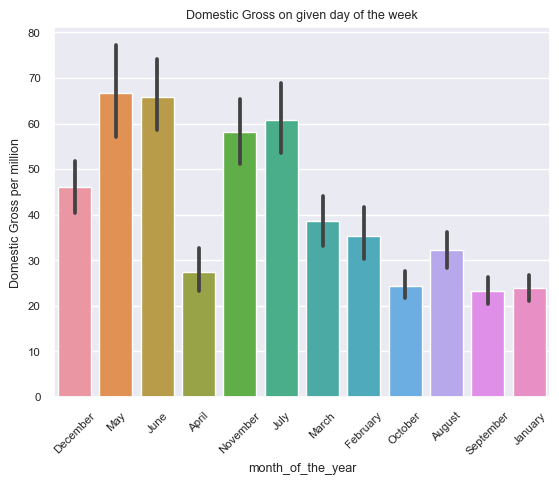

In [27]:
#Plotting
sns.barplot(x = 'month_of_the_year', y = 'domestic_gross_in_mill', data = budgets)
sns.set(font_scale=0.75)
plt.xticks(rotation=45)

# Show graphic
plt.ylabel('Domestic Gross per million')
plt.title('Domestic Gross on given day of the week')
plt.show()

Releasing our movie during the summer months, like June, July, and May, makes sense. That's when students are out of school, and families are more likely to go to the movies. During winter, the weather can keep people from going out to see films. In the summer, we have a bigger audience, and the weather won't stop them from watching our movie. This should help us reach more viewers and make more money.

# Finding the right muscian for the score

When was the last time you watched a movie without any music? Movie scores are incredibly important, and audiences often don't fully appreciate their significance. Without a soundtrack, a movie would feel awkward and disconnect us from the experience. Music acts as an amplifier; a bad soundtrack can reinforce negative opinions about a film, while a great one can truly immerse the audience in the director's vision.

So, it's crucial for us to find a talented musician with a track record of working on successful films. Their expertise in crafting a captivating soundtrack can greatly enhance the overall impact and success of our movie.

In [28]:
# Selecting individuals for filtering
people_and_movies_df = pd.read_sql("""
    SELECT p.person_id, primary_name, primary_profession, primary_title, original_title, genres
    FROM persons AS p
    INNER JOIN known_for AS k ON p.person_id = k.person_id
    INNER JOIN movie_basics AS m ON k.movie_id = m.movie_id;
""", conn)

In [29]:
# Merge two DataFrames 'merged_df' and 'people_and_movies_df' using an outer join
relevant_people_and_movies = pd.merge(merged_df, people_and_movies_df, how='outer', left_on='movie', right_on='original_title')

# Drop columns we don't need
relevant_people_and_movies = relevant_people_and_movies.drop(['release_date',
  'runtime_minutes', 'original_title', 'genre'], axis=1)

# Sort the DataFrame by 'ROI' in descending order
relevant_people_and_movies = relevant_people_and_movies.sort_values(by='ROI', ascending=False)

# Drop rows with missing 'primary_profession' values
relevant_people_and_movies = relevant_people_and_movies.dropna(subset=['primary_profession'])

# Filter the DataFrame based on primary profession
chosen_artists = relevant_people_and_movies[relevant_people_and_movies['primary_profession'].str.contains \
                                                  ('soundtrack|composer|music_department|sound_deparment')]
# Select relevant columns
chosen_artists = chosen_artists[['primary_name', 'primary_profession', 'ROI', 'averagerating', 'numvotes']]

# Drop duplicate rows, if any
chosen_artists = chosen_artists.drop_duplicates()

# Sort by 'average rating' in descending order 
chosen_artists = chosen_artists.sort_values(by='averagerating', ascending=False)

# Chose only 'successful' artists by setting the roi to 2 as well as the minimum rating to 7 and display final result
chosen_artists = chosen_artists[chosen_artists['ROI'] > 1.74]
chosen_artists = chosen_artists[chosen_artists['numvotes'] > 10000]
chosen_artists[chosen_artists['averagerating'] >= 7]

,primary_name,primary_profession,ROI,averagerating,numvotes
2745,Sam Estes,"music_department,composer,executive",4.22,8.80,1841066.00
2770,Andrew Kawczynski,"music_department,composer",4.22,8.80,1841066.00
2743,Bruce Fowler,"music_department,soundtrack,composer",4.22,8.80,1841066.00
2765,Ann Marie Calhoun,"music_department,soundtrack,actress",4.22,8.80,1841066.00
2746,Satnam Ramgotra,"music_department,soundtrack,composer",4.22,8.80,1841066.00
...,...,...,...,...,...
27102,John Deacon,"soundtrack,composer,actor",2.65,7.00,657690.00
27105,John Debney,"music_department,composer,soundtrack",2.65,7.00,657690.00
27090,Mick Jones,"soundtrack,music_department,actor",2.65,7.00,657690.00
27088,Lisbeth Scott,"music_department,composer,soundtrack",2.65,7.00,657690.00


This list comprises highly successful musicians who have consistently delivered a positive return on investment (ROI) in the context of high-budget films. Additionally, we've filtered for musicians who have received critical acclaim, ensuring that we can place our trust in their ability to create an exceptional soundtrack.

# Backup directors

In [30]:
# Merge two DataFrames 'merged_df' and 'people_and_movies_df' using an outer join
relevant_people_and_movies = pd.merge(merged_df, people_and_movies_df, how='outer', left_on='movie', right_on='original_title')

# Drop columns we don't need
relevant_people_and_movies = relevant_people_and_movies.drop(['release_date',
  'runtime_minutes', 'original_title', 'genre'], axis=1)

# Sort the DataFrame by 'averagerating' in descending order (changed from 'ROI')
relevant_people_and_movies = relevant_people_and_movies.sort_values(by='averagerating', ascending=False)

# Drop rows with missing 'primary_profession' values
relevant_people_and_movies = relevant_people_and_movies.dropna(subset=['primary_profession'])

# Filter the DataFrame based on primary profession (director)
chosen_directors = relevant_people_and_movies[relevant_people_and_movies['primary_profession'].str.contains('director')]

# Select relevant columns
chosen_directors = chosen_directors[['primary_name', 'primary_profession', 'averagerating', 'numvotes']]

# Drop duplicate rows, if any
chosen_directors = chosen_directors.drop_duplicates()

# Sort by 'averagerating' in descending order (optional)
chosen_directors = chosen_directors.sort_values(by='averagerating', ascending=False)

# Filtering for above 7 rating
chosen_directors_filtered = chosen_directors[chosen_directors['averagerating'] >= 7.0]

# Display the directors with the highest ratings
chosen_directors_filtered.dropna().reset_index()

,index,primary_name,primary_profession,averagerating,numvotes
0,2772,Alexandre Ottoveggio,"actor,stunts,director",8.80,1841066.00
1,2706,James P. Lay,"sound_department,writer,director",8.80,1841066.00
2,2748,Talulah Riley,"actress,director,writer",8.80,1841066.00
3,2712,Kevin Westley,"assistant_director,location_management,miscell...",8.80,1841066.00
4,2713,Chris Patterson,"cinematographer,camera_department,director",8.80,1841066.00
...,...,...,...,...,...
1456,28840,Elias Mael,"miscellaneous,director,writer",7.00,356556.00
1457,28838,Dominic Ewenson,"producer,miscellaneous,director",7.00,356556.00
1458,28843,Jason Nardella,"art_department,director,editor",7.00,356556.00
1459,28849,Nicole Groton,"miscellaneous,camera_department,director",7.00,356556.00


This list includes alternative directors in case we are unable to collaborate with our preferred choice.

# Conclusion

An EDA only allows us to look at the statistical data and come up with likely probabilities. There is no way to guarantee the performance of any individual director, actor, musician, or genre. However, with that being said, we feel comfortable creating business recommendations based on the likelihood of these events occurring, as well as basing them on the trends within the industry.

- Categorically, action films generate the largest return on investment by far, compared to any other movie genre. This is likely due to the mass popularity of action films. We should aim to create an action movie as it will have the largest target audience as well as generate the most ROI for our company.
<br>
- The best day to release our film is during Wednesday. Most films are actually released on Friday; however, Wednesday has the largest ROI by far. We should aim for the warmer months as well, such as June, July, and May. As those months tend to generate the most ROI as well.

        - This is likely because during the warmer months, people are willing to drive out to see movies and spend time, whereas during colder months, people will tend to stay home to avoid inclement weather.
        - Wednesday likely generates the highest ROI because it's in the middle of the week, which allows most people to view the film within the first week. However, there is no real way to prove this theory; all we know is that Wednesday generates the highest ROI on average.
<br>
- We should absolutely work with a talented director who is not only critically acclaimed but also has a reputation for generating a positive ROI. Through data exploration as well as visualizations, we've come to the conclusion that the current best option would be Christopher Nolan. We have also provided a table of potential backup directors who all meet our criteria, assuming Mr. Nolan is not available.

        - Mr. Nolan generates an above-average ROI compared to other high-budget films (1.74 Avg / 3.13 Nolan).
        - He has one of the highest IMDb user rating scores (8.8).
        - The majority of his movies fall within a 7.8-8.8 range of user ratings.
        - The probability of a Christopher Nolan film underperforming is close to 3.8%.
<br>
- The score of a movie is incredibly important as it often dictates the mood and ambiance of the film. With that being said, we have provided a list of potential musicians who fall within our selected criteria.

        - James P. Lay and Kevin Westley are our two recommendations for soundtrack producers. They have collectively worked on incredible movies such as Inception, Se7en, World War Z, Fight Club, and The Dark Knight.

# Next Steps

To provide even more insight for Universal Pictures, these are the steps we could take

- Predictive Modeling: We can build predictive models using machine learning techniques. We could use features like director, genre, release date, and budget to predict box office performance. This would require splitting our data into training and testing sets, selecting appropriate algorithms, and evaluating model performance.

<br>

- A/B Testing: We could consider running A/B tests for factors like release date or marketing strategies to determine their impact on box office success. A well-designed A/B test can provide valuable insights.

<br>

- Market Analysis: We could conduct a deeper market analysis to understand the competitive landscape and audience preferences. Analyze trends in the movie industry, such as the rise of streaming services and changing consumer behavior.

<br>

- Budget Optimization: Explore cost optimization strategies, such as how to allocate the budget effectively across different aspects of movie production, including marketing and distribution.